In [84]:
%matplotlib inline
"""
Lossy compression to replace a range of colors with a single color.
"""

'\nLossy compression to replace a range of colors with a single color.\n'

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
import mahotas as mh

In [86]:
original_img = np.array(mh.imread('./data/image-quant/me-n-kelly.jpg'), dtype=np.float64) / 255

In [87]:
original_dimensions = tuple(original_img.shape)

In [88]:
width, height, depth = tuple(original_img.shape)

In [89]:
image_flattened = np.reshape(original_img, (width * height, depth))

In [90]:
image_array_sample = shuffle(image_flattened, random_state=0)[:1000]

In [91]:
estimator = KMeans(n_clusters=64, random_state=0)

In [92]:
estimator.fit(image_array_sample)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=64, n_init=10,
    n_jobs=1, precompute_distances=True, random_state=0, tol=0.0001,
    verbose=0)

In [93]:
cluster_assignments = estimator.predict(image_flattened)

In [94]:
compressed_palette = estimator.cluster_centers_

In [95]:
compressed_img = np.zeros((width, height, compressed_palette.shape[1]))
print compressed_img.shape
print original_img.shape

(540, 960, 3)
(540, 960, 3)


In [96]:
label_idx = 0
for i in range(width):
    for j in range(height):
        compressed_img[i][j] = compressed_palette[cluster_assignments[label_idx]]
        label_idx += 1

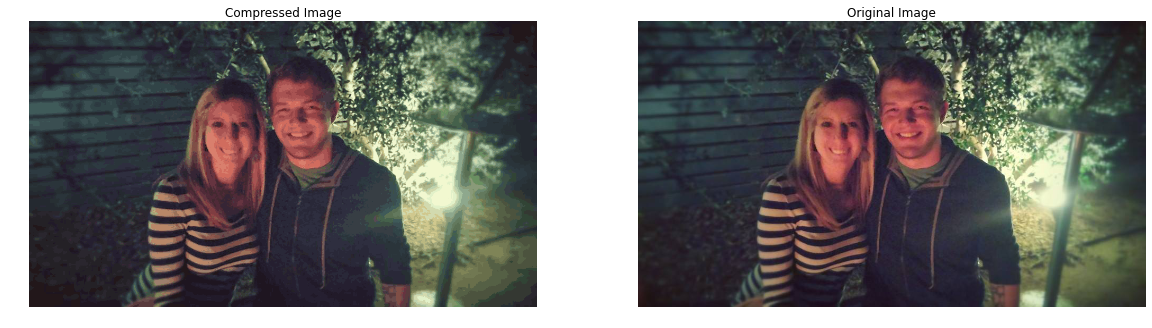

In [113]:
plt.subplots(figsize=(20,80))

plt.subplot(122)
plt.title('Original Image')
plt.imshow(original_img)
plt.axis('off')
plt.subplot(121)
plt.title('Compressed Image')
plt.imshow(compressed_img)
plt.axis('off')
plt.show()